<a href="https://colab.research.google.com/github/S3688570/Cars_Deep_Learning/blob/master/CarsCNN_VGG16_Act_Map2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Activation Map of VGG16 CNN model

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# New Section

In [2]:
!ls "/content/drive/My Drive/"

'Colab Notebooks'  'Getting started.pdf'


In [3]:
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [4]:
model = VGG16(weights='imagenet')





553467904/553467096 [==============================] - 16s 0us/step








In [0]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
from PIL import Image
import os

In [0]:
import random
for i in range(1, 10, 1):
  m = random.randint(1,101)
  # The local path to our target image2
  testCarImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/test_set/car/')
  testFilename = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/test_set/car/' + testCarImages[m]
  # `img` is a PIL image of size 224x224
  img = image.load_img(testFilename, target_size=(224, 224))
  # `x` is a float32 Numpy array of shape (224, 224, 3)
  x = image.img_to_array(img)
  # We add a dimension to transform our array into a "batch"
  # of size (1, 224, 224, 3)
  x = np.expand_dims(x, axis=0)
  # Finally we preprocess the batch
  # (this does channel-wise color normalization)
  x = preprocess_input(x)

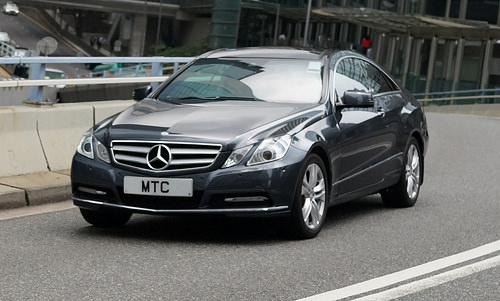

In [7]:
dimage = Image.open(testFilename)
dimage

In [8]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


40960/35363 [==================================] - 0s 0us/step
Predicted: [('n04285008', 'sports_car', 0.45595887), ('n03770679', 'minivan', 0.11531404), ('n03100240', 'convertible', 0.06872476)]


In [9]:
np.argmax(preds[0])

817

In [0]:
from keras import backend as K
# This is the "car" entry in the prediction vector
car_output = model.output[:, 436]
# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model.get_layer('block5_conv3')
# This is the gradient of the "car" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(car_output, last_conv_layer.output)[0]
# This is a vector of shape (512,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))
# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `block5_conv3`,
# given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])
# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the elephant class
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

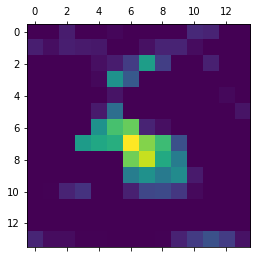

In [11]:
import matplotlib.pyplot as plt
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [0]:
import cv2
# We use cv2 to load the original image
img = cv2.imread(testFilename)
# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap * 0.4 + img

In [19]:
# Save the image to disk
cv2.imwrite('car_heatmap.jpg', superimposed_img)

True

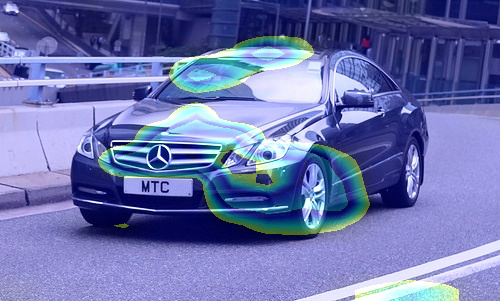

In [20]:
dimage = Image.open('car_heatmap.jpg')
dimage